<a href="https://colab.research.google.com/github/Shibli-Nomani/project-01--Heart-Disease/blob/main/hyper_para_multiple_ml_oversample_heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
import warnings
warnings.filterwarnings("ignore")

Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
path='/content/gdrive/MyDrive/Final Project/train.csv'
df=pd.read_csv(path)
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,-1.422409,0,0,1,-0.366034,-0.460504,0,0,12,5,0,1,4,-0.142328,0,0,0
1,0,-0.653422,0,0,0,-0.366034,-0.460504,0,0,11,5,0,0,2,-1.033281,0,0,1
2,0,0.822955,1,0,0,4.347674,-0.460504,1,0,12,5,2,0,2,1.639578,1,0,0
3,0,-0.208323,0,0,0,-0.366034,-0.460504,0,0,12,5,1,0,1,-1.924234,0,1,0
4,0,2.621233,0,0,0,-0.366034,-0.460504,1,1,9,5,0,1,2,2.530531,0,0,0


In [4]:
#target
y=df['HeartDisease']
#features
X=df.copy()
X=df.drop('HeartDisease', axis=1)
X.head(5)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,-1.422409,0,0,1,-0.366034,-0.460504,0,0,12,5,0,1,4,-0.142328,0,0,0
1,-0.653422,0,0,0,-0.366034,-0.460504,0,0,11,5,0,0,2,-1.033281,0,0,1
2,0.822955,1,0,0,4.347674,-0.460504,1,0,12,5,2,0,2,1.639578,1,0,0
3,-0.208323,0,0,0,-0.366034,-0.460504,0,0,12,5,1,0,1,-1.924234,0,1,0
4,2.621233,0,0,0,-0.366034,-0.460504,1,1,9,5,0,1,2,2.530531,0,0,0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, f1_score, auc,roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error


from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")



#**Over Sampling**

In [6]:
df1=df.copy()
#Target
y=df1['HeartDisease']
#Features

X=df1.copy()
X=df1.drop('HeartDisease', axis=1)

In [7]:
!pip install imblearn
from imblearn.combine import SMOTETomek
sm = SMOTETomek(random_state=42)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
X_sm, y_sm = sm.fit_resample(X,y)

In [9]:
from sklearn.model_selection import train_test_split
X_sm_train, X_sm_test, y_sm_train, y_sm_test=train_test_split(X_sm,y_sm, test_size=0.3, random_state=42)
print(X_sm.shape)
print(y_sm.shape)

(418800, 17)
(418800,)


#**Compare Different Model without Hyperparameter Tuning**

In [ ]:
models = [
   LogisticRegression(),
   LinearSVC(random_state=42),
   SGDClassifier(),
   KNeighborsClassifier(),
   RandomForestClassifier(random_state=42),
   DecisionTreeClassifier(random_state=42),
   GradientBoostingClassifier(random_state=42),
   XGBClassifier(random_state=42),
   AdaBoostClassifier(random_state=42),
   LinearDiscriminantAnalysis()
   ]

In [ ]:
names =['Logestic Regression', 'SVMLinear', 'SGD', 'KNN', 'RandomForest', 'DecisionTree', 'GradientBoost', 'XGBOOST', 'ADABoost', 'LDA']  

models_columns = []
models_compare = pd.DataFrame(columns = models_columns)

row_index = 0
for models_name, ml in zip(names, models): 
    
    ml.fit(X_sm_train, y_sm_train)
    y_sm_pred=ml.fit(X_sm_train, y_sm_train).predict(X_sm_test)
    fp, tp, tn = roc_curve(y_sm_test, y_sm_pred)
    #models_name = ml.__class__.__name__
    models_compare.loc[row_index,'Model Name'] = models_name
    models_compare.loc[row_index, 'Train Accuracy'] = round(ml.score(X_sm_train, y_sm_train), 5)
    models_compare.loc[row_index, 'Test Accuracy'] = round(ml.score(X_sm_test, y_sm_test), 5)
    models_compare.loc[row_index, 'Precission'] = precision_score(y_sm_test, y_sm_pred)
    models_compare.loc[row_index, 'Recall'] = recall_score(y_sm_test, y_sm_pred)
    models_compare.loc[row_index, 'f1 Score']=f1_score(y_sm_test, y_sm_pred)
    models_compare.loc[row_index, 'AUC'] = auc(fp, tp)
    models_compare.loc[row_index, 'mean abs error']=mean_absolute_error(y_sm_test, y_sm_pred)
    row_index+=1
    
models_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)

In [ ]:
models_compare.style.set_properties(**{'background-color': 'blue',
                           'color': 'white'})

,Model Name,Train Accuracy,Test Accuracy,Precission,Recall,f1 Score,AUC,mean abs error
4,RandomForest,0.997750,0.913800,0.905739,0.923178,0.914375,0.913828,0.086199
5,DecisionTree,0.997790,0.874010,0.867596,0.881877,0.874678,0.874036,0.125987
3,KNN,0.897900,0.857080,0.810300,0.931384,0.866633,0.857298,0.142916
6,GradientBoost,0.811740,0.812620,0.791752,0.846914,0.818405,0.812722,0.187377
7,XGBOOST,0.811520,0.812000,0.791370,0.845924,0.817738,0.812101,0.187997
8,ADABoost,0.779650,0.780440,0.765876,0.805980,0.785416,0.780510,0.219564
1,SVMLinear,0.741500,0.742880,0.710292,0.817826,0.760276,0.743093,0.257124
0,Logestic Regression,0.741700,0.742730,0.719228,0.793863,0.754705,0.742873,0.257275
9,LDA,0.741650,0.742730,0.711931,0.812893,0.759069,0.742936,0.257267
2,SGD,0.730750,0.732120,0.680826,0.871005,0.764262,0.732517,0.267884


#**Compare Different Model with Hyperparameter Tuning**

**Multiple Classification Model List**

In [8]:
# Different ML Models
ml1=LogisticRegression(random_state=42)
ml2=LinearSVC(random_state=42)
ml3=SGDClassifier(random_state=42)
ml4=KNeighborsClassifier()
ml5=RandomForestClassifier(random_state=42)
ml6=DecisionTreeClassifier(random_state=42)
ml7=GradientBoostingClassifier(random_state=42)
ml8=XGBClassifier(random_state=42)
ml9=AdaBoostClassifier(random_state=42)
ml10=LinearDiscriminantAnalysis()
   

**Logistic Regression**

In [23]:
#Logistic Regression
param1 = {}
param1['classifier__C'] = [ 1, 2, 5]
param1['classifier__max_iter'] = [20,50,100]
param1['classifier__solver']=['lbfgs', 'liblinear', 'saga']
param1['classifier__penalty'] = ['l1', 'l2']
param1['classifier__multi_class'] = ['ovr', 'multinomial', 'auto'] 
param1['classifier'] = [ml1]
pipeline = Pipeline([('classifier', ml1)])
gs = GridSearchCV(pipeline, param1, cv=3, n_jobs=1, scoring='roc_auc').fit(X_sm_train, y_sm_train)


In [24]:
gs.best_params_

{'classifier': LogisticRegression(C=2, multi_class='ovr', random_state=42),
 'classifier__C': 2,
 'classifier__max_iter': 100,
 'classifier__multi_class': 'ovr',
 'classifier__penalty': 'l2',
 'classifier__solver': 'lbfgs'}

In [25]:
gs.best_score_

0.8088633562121547

**SVM Linear**

In [ ]:
#SVM Linear
param2 = {}
param2['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param2['classifier__max_iter'] = [2500]
param2['classifier__tol']=[1e-3, 1e-5, 1e-7]
param2['classifier__multi_class'] = ['ovr', 'multinomial', 'auto']
param2['classifier__loss'] = ['squared_hinge', 'crammer_singer','hinge' ]    
param2['classifier'] = [ml2]
pipeline = Pipeline([('classifier', ml2)])
gs = GridSearchCV(pipeline, param2, cv=3, n_jobs=1, scoring='roc_auc').fit(X_sm_train, y_sm_train)

In [ ]:
gs.best_params_

{'classifier': LinearSVC(C=1, max_iter=2500, random_state=42, tol=0.001),
 'classifier__C': 1,
 'classifier__loss': 'squared_hinge',
 'classifier__max_iter': 2500,
 'classifier__multi_class': 'ovr',
 'classifier__tol': 0.001}

In [ ]:
gs.best_score_

0.8088749344443021

**SGD**

Text(0, 0.5, 'Testing Accuracy')

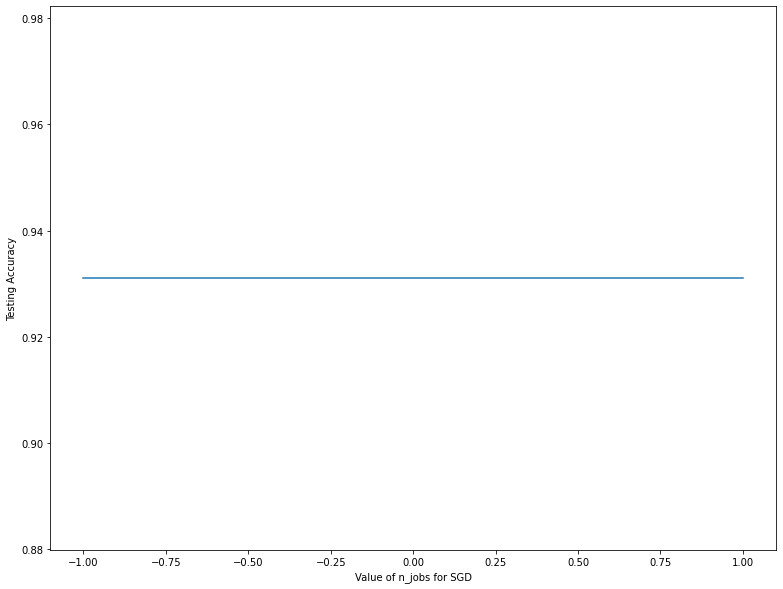

In [ ]:
scores= []
for k in range(-1,2):
	sgd_val=SGDClassifier(n_jobs=k)
	sgd_val.fit(X_sm_train, y_sm_train)
	y_val = sgd_val.predict(X_sm_test)
	scores.append (accuracy_score(y_sm_test, y_val))
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
plt.plot(range(-1,2),scores)
plt.xlabel ('Value of n_jobs for SGD')
plt.ylabel('Testing Accuracy')

Text(0, 0.5, 'Testing Accuracy')

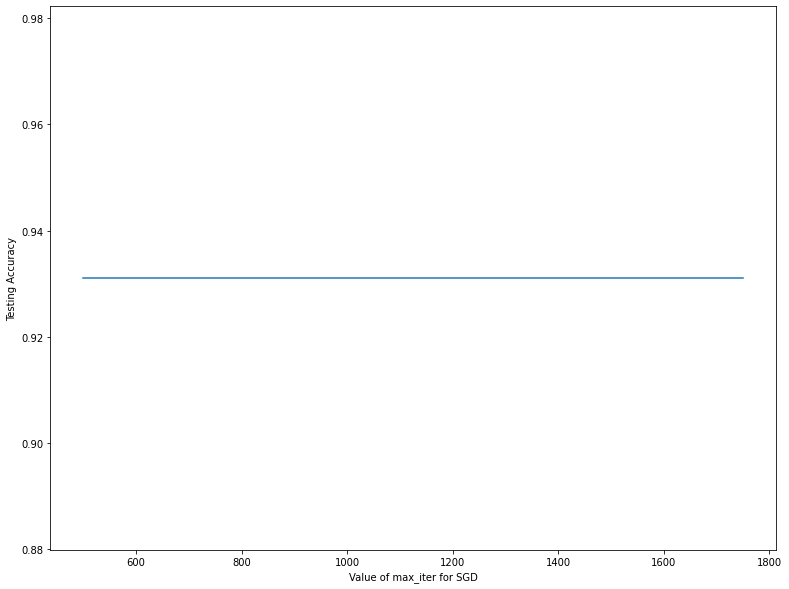

In [ ]:
scores= []
for k in range(500,2000,250):
	sgd_val=SGDClassifier(max_iter=k)
	sgd_val.fit(X_sm_train, y_sm_train)
	y_val = sgd_val.predict(X_sm_test)
	scores.append (accuracy_score(y_sm_test, y_val))
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
plt.plot(range(500,2000,250),scores)
plt.xlabel ('Value of max_iter for SGD')
plt.ylabel('Testing Accuracy')

In [ ]:
#SGD
param3 = {}
param3['classifier__max_iter'] = [200,500]
param3['classifier__tol']=[1e-3, 1e-5]
param3['classifier__penalty']=['l1', 'l2']
param3['classifier__loss'] = ['hinge', 'log_loss', 'log', 'modified_huber','squared_hinge', 'perceptron', 
'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
param3['classifier'] = [ml3]
pipeline = Pipeline([('classifier', ml3)])


In [ ]:
gs = GridSearchCV(pipeline, param3, cv=3, n_jobs=-1, scoring='roc_auc').fit(X_sm_train, y_sm_train)
gs.best_params_

{'classifier': SGDClassifier(loss='log', max_iter=200, penalty='l1', random_state=42,
               tol=1e-05),
 'classifier__loss': 'log',
 'classifier__max_iter': 200,
 'classifier__penalty': 'l1',
 'classifier__tol': 1e-05}

In [ ]:
gs.best_params_

{'classifier': SGDClassifier(loss='log', max_iter=200, penalty='l1', random_state=42,
               tol=1e-05),
 'classifier__loss': 'log',
 'classifier__max_iter': 200,
 'classifier__penalty': 'l1',
 'classifier__tol': 1e-05}

In [ ]:
gs.best_score_

0.8087823175923287

**K-nearest Neighbouring**

**k-value identification for KNN**

In [ ]:
# calculating the accuracy of models with different values of k
mean_acc = np.zeros(10)
for i in range(1,11):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_sm_train,y_sm_train)
    yhat= knn.predict(X_sm_test)
    mean_acc[i-1] = accuracy_score(y_sm_test, yhat)

mean_acc

array([0.88744826, 0.87176059, 0.86664279, 0.86553645, 0.85708373,
       0.85988539, 0.84977714, 0.85273798, 0.84399077, 0.84687202])

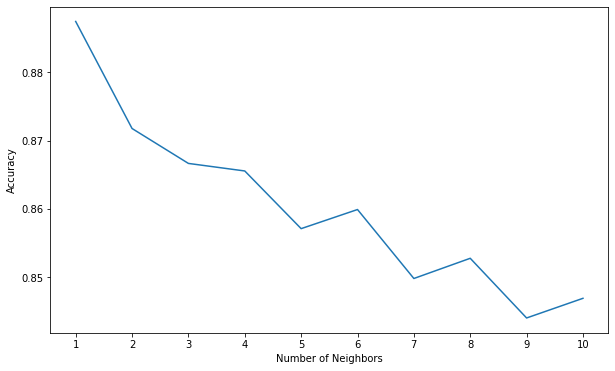

In [ ]:
loc = np.arange(1,11,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,11), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#KNN
param4 = {}
param4['classifier__n_neighbors'] = [2,5]
param4['classifier__weights'] = ['uniform']
param4['classifier__metric'] =['minkowski','euclidean','manhattan']
param4['classifier'] = [ml4]
pipeline = Pipeline([('classifier', ml4)])
gs = GridSearchCV(pipeline, param4, cv=3, n_jobs=1, scoring='roc_auc').fit(X_sm_train, y_sm_train)

In [ ]:
gs.best_params_

{'classifier': KNeighborsClassifier(metric='manhattan'),
 'classifier__metric': 'manhattan',
 'classifier__n_neighbors': 5,
 'classifier__weights': 'uniform'}

In [ ]:
gs.best_score_

0.9148296509135737

**Random Forest Classifier**



**n_estimators for RandomForest**

Text(0, 0.5, 'Testing Accuracy')

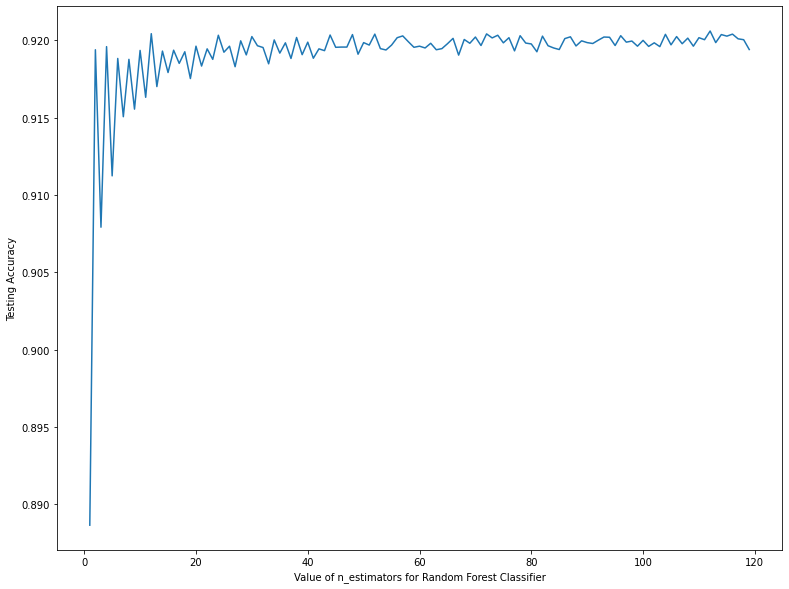

In [ ]:
scores= []
for k in range(1,120):
	rfc_val=RandomForestClassifier (n_estimators=k)
	rfc_val.fit(X_sm_train, y_sm_train)
	y_sm_val = rfc_val.predict(X_sm_test)
	scores.append (accuracy_score(y_sm_test, y_sm_val))
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
plt.plot(range(1,120),scores)
plt.xlabel ('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

Text(0, 0.5, 'Testing Accuracy')

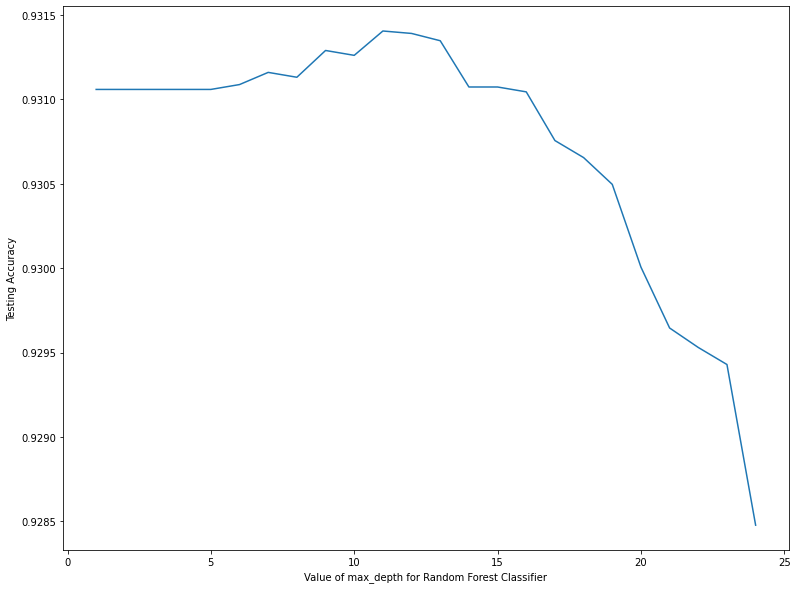

In [ ]:
scores= []
for k in range(1,25):
	rfc_val=RandomForestClassifier (max_depth=k)
	rfc_val.fit(X_sm_train, y_sm_train)
	y_sm_val = rfc_val.predict(X_sm_test)
	scores.append (accuracy_score(y_sm_test, y_sm_val))
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
plt.plot(range(1,25),scores)
plt.xlabel ('Value of max_depth for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [ ]:
#RandomForest
param5 = {}
param5['classifier__n_estimators'] = [115,116,117]
param5['classifier__max_depth'] = [10,11,12, None]
param5['classifier__criterion'] = ['gini', 'entropy', 'log_loss']
param5['classifier__max_features'] = ['sqrt', 'log2', None]
param5['classifier'] = [ml5]
pipeline = Pipeline([('classifier', ml5)])
gs = GridSearchCV(pipeline, param5, cv=3, n_jobs=1, scoring='roc_auc').fit(X_sm_train, y_sm_train)

In [ ]:
gs.best_params_

{'classifier': RandomForestClassifier(criterion='entropy', max_features=None, n_estimators=117,
                        random_state=42),
 'classifier__criterion': 'entropy',
 'classifier__max_depth': None,
 'classifier__max_features': None,
 'classifier__n_estimators': 117}

In [ ]:
gs.best_score_

0.9553969560501666

In [26]:
RandomForestClassifier(criterion='entropy', max_depth=10,
                        random_state=42)
ml5.fit(X_sm_train, y_sm_train)
y_sm_pred_rf=ml5.fit(X_sm_train, y_sm_train).predict(X_sm_test)
print(ml5.score(X_sm_train, y_sm_train))
print(ml5.score(X_sm_test, y_sm_test))

0.9977520807750034
0.9138013371537727


**Decision Tree Classifier**

**n_estimators for DecisionTree**

Text(0, 0.5, 'Testing Accuracy')

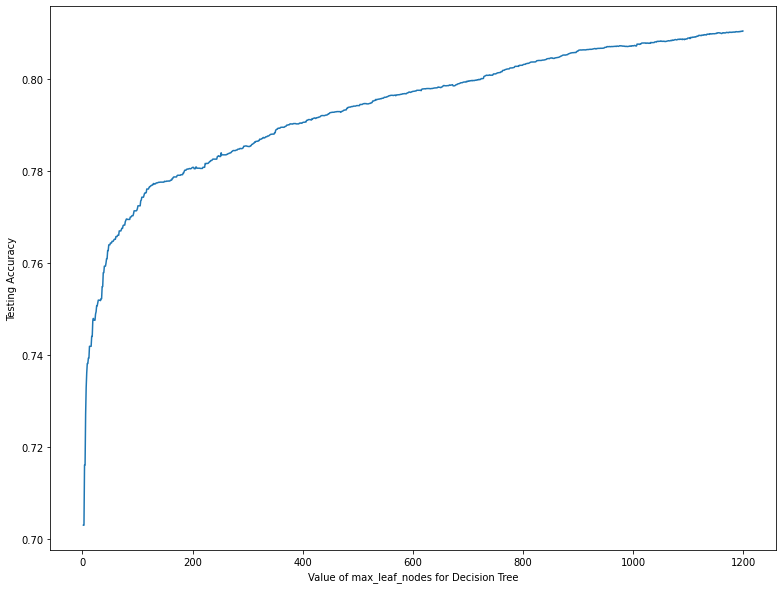

In [ ]:
scores= []
for k in range(2,1200):
	dtc_val=DecisionTreeClassifier(max_leaf_nodes=k)
	dtc_val.fit(X_sm_train, y_sm_train)
	y_sm_val = dtc_val.predict(X_sm_test)
	scores.append (accuracy_score(y_sm_test, y_sm_val))
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
plt.plot(range(2,1200),scores)
plt.xlabel ('Value of max_leaf_nodes for Decision Tree')
plt.ylabel('Testing Accuracy')

Text(0, 0.5, 'Testing Accuracy')

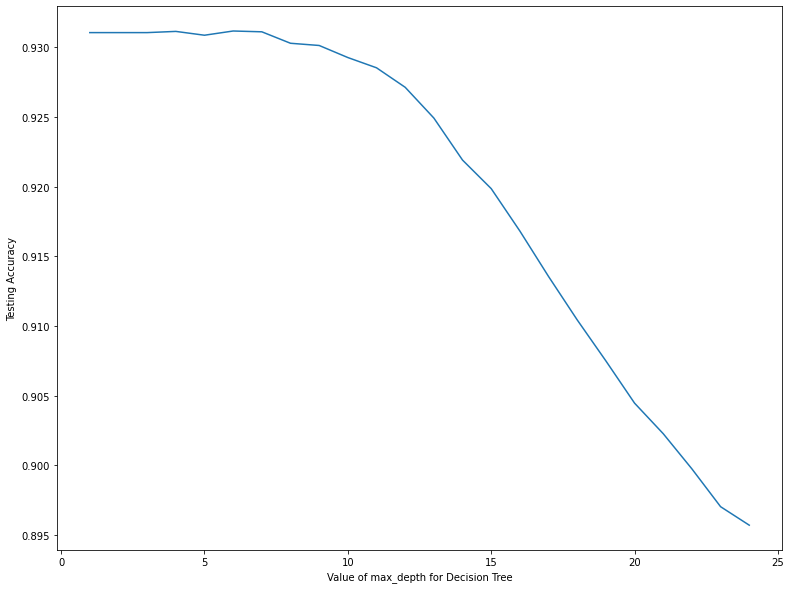

In [ ]:
scores= []
for k in range(1,25):
	dtc_val=DecisionTreeClassifier(max_depth=k)
	dtc_val.fit(X_sm_train, y_sm_train)
	y_sm_val = dtc_val.predict(X_sm_test)
	scores.append (accuracy_score(y_sm_test, y_sm_val))
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
plt.plot(range(1,25),scores)
plt.xlabel ('Value of max_depth for Decision Tree')
plt.ylabel('Testing Accuracy')

In [ ]:
#DecisionTree
param6 = {}
param6['classifier__max_depth'] = [2, 5, 6,None]
param6['classifier__splitter'] = ['best', 'random']
param6['classifier__max_leaf_nodes'] = [1200,1500,2000, None]
param6['classifier__max_depth'] = [2, 3, 5]
param6['classifier__criterion'] = ['gini', 'entropy', 'log_loss']
param6['classifier'] = [ml6]
pipeline = Pipeline([('classifier', ml6)])
gs = GridSearchCV(pipeline, param6, cv=3, n_jobs=1, scoring='roc_auc').fit(X_sm_train, y_sm_train)

In [ ]:
gs.best_params_

{'classifier': DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=1200,
                        random_state=42),
 'classifier__criterion': 'entropy',
 'classifier__max_depth': 5,
 'classifier__max_leaf_nodes': 1200,
 'classifier__splitter': 'best'}

In [ ]:
gs.best_score_

0.8204772932990463

In [ ]:
DecisionTreeClassifier(max_depth=5, random_state=42)
ml6.fit(X_sm_train, y_sm_train)
y_sm_pred_dtc=ml6.fit(X_sm_train, y_sm_train).predict(X_sm_test)
print(ml6.score(X_sm_train, y_sm_train))
print(ml6.score(X_sm_test, y_sm_test))

0.7486560240141902
0.7495065265838905


**Gradient Descent Classifier**

In [ ]:
#Gradient Descent Classifier
param7 = {}
param7['classifier__n_estimators'] = [10, 50, 100, 200]
param7['classifier__max_depth'] = [5, 10, 20]
param7['classifier'] = [ml7]
pipeline = Pipeline([('classifier', ml7)])
gs = GridSearchCV(pipeline, param7, cv=3, n_jobs=1, scoring='roc_auc').fit(X_sm_train, y_sm_train)

In [ ]:
gs.best_params_

{'classifier': GradientBoostingClassifier(max_depth=20, n_estimators=200, random_state=42),
 'classifier__max_depth': 20,
 'classifier__n_estimators': 200}

In [ ]:
gs.best_score_

0.9783886770205149

**XGBOOST**

In [ ]:
#XGBoost
param8 = {}
param8['classifier__max_depth'] = [5,6,8,10,None]
param8['classifier__learning_rate'] = [ 0.1, 0.2, 0.3]
param8['classifier__gamma']=[ 0.0, 0.1, 0.2]
pipeline = Pipeline([('classifier', ml8)])
gs = GridSearchCV(pipeline, param8, cv=3, n_jobs=1, scoring='roc_auc').fit(X_sm_train, y_sm_train)

In [ ]:
gs.best_params_

{'classifier__gamma': 0.1,
 'classifier__learning_rate': 0.3,
 'classifier__max_depth': 10}

In [ ]:
gs.best_score_

0.972743655425973

**AdaBoost**

In [ ]:
#AdaBoost
param9 = {}
param9['classifier__n_estimators'] = [10, 50, 70,100, 150]
param9['classifier__learning_rate']=[ 1, 2]
pipeline = Pipeline([('classifier', ml9)])
gs = GridSearchCV(pipeline, param9, cv=3, n_jobs=1, scoring='roc_auc').fit(X_sm_train, y_sm_train)

In [ ]:
gs.best_params_

{'classifier__learning_rate': 1, 'classifier__n_estimators': 100}

In [ ]:
gs.best_score_

0.8838939218300524

**Compare Different Model with Hyperparameter Tuning**

In [10]:
models = [
   LogisticRegression(C=2, multi_class='ovr', random_state=42, solver='liblinear'),
   LinearSVC(C=1, max_iter=2500, random_state=42, tol=0.001),
   SGDClassifier(loss='log', max_iter=200, penalty='l1', random_state=42,
               tol=1e-05),
   KNeighborsClassifier(metric='manhattan'),
   RandomForestClassifier(criterion='entropy', random_state=42),
   DecisionTreeClassifier(criterion='entropy', random_state=42),
   GradientBoostingClassifier(max_depth=20, n_estimators=200, random_state=42),
   XGBClassifier(random_state=42),
   AdaBoostClassifier(random_state=42),
   LinearDiscriminantAnalysis()
   ]

In [ ]:
names =['Logestic Regression', 'SVMLinear', 'SGD', 'KNN', 'RandomForest', 'DecisionTree', 'GradientBoost', 'XGBOOST', 'ADABoost', 'LDA']  

models_columns = []
models_compare = pd.DataFrame(columns = models_columns)

row_index = 0
for models_name, ml in zip(names, models): 
    
    ml.fit(X_sm_train, y_sm_train)
    y_sm_pred=ml.fit(X_sm_train, y_sm_train).predict(X_sm_test)
    fp, tp, tn = roc_curve(y_sm_test, y_sm_pred)
    #models_name = ml.__class__.__name__
    models_compare.loc[row_index,'Model Name'] = models_name
    models_compare.loc[row_index, 'Train Accuracy'] = round(ml.score(X_sm_train, y_sm_train), 5)
    models_compare.loc[row_index, 'Test Accuracy'] = round(ml.score(X_sm_test, y_sm_test), 5)
    models_compare.loc[row_index, 'Precission'] = precision_score(y_sm_test, y_sm_pred)
    models_compare.loc[row_index, 'Recall'] = recall_score(y_sm_test, y_sm_pred)
    models_compare.loc[row_index, 'f1 Score']=f1_score(y_sm_test, y_sm_pred)
    models_compare.loc[row_index, 'AUC'] = auc(fp, tp)
    models_compare.loc[row_index, 'mean abs error']=mean_absolute_error(y_sm_test, y_sm_pred)
    row_index+=1
    
models_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    


In [12]:

models_compare.style.set_properties(**{'background-color': 'blue',
                           'color': 'white'})


,Model Name,Train Accuracy,Test Accuracy,Precission,Recall,f1 Score,AUC,mean abs error
6,GradientBoost,0.997670,0.937160,0.934172,0.940212,0.937182,0.937171,0.062838
4,RandomForest,0.997760,0.913280,0.904601,0.923433,0.913920,0.913305,0.086724
5,DecisionTree,0.997790,0.875290,0.868901,0.883106,0.875946,0.875317,0.124706
3,KNN,0.902660,0.863410,0.819689,0.930777,0.871708,0.863606,0.136589
7,XGBOOST,0.811520,0.812000,0.791370,0.845924,0.817738,0.812101,0.187997
8,ADABoost,0.779650,0.780440,0.765876,0.805980,0.785416,0.780510,0.219564
1,SVMLinear,0.741870,0.742860,0.714078,0.807593,0.757962,0.743048,0.257139
9,LDA,0.741650,0.742730,0.711931,0.812893,0.759069,0.742936,0.257267
0,Logestic Regression,0.741690,0.742700,0.719203,0.793847,0.754684,0.742849,0.257299
2,SGD,0.733370,0.733600,0.747526,0.703120,0.724643,0.733508,0.266404
